In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import gc
import re

from sklearn import datasets
from sklearn.decomposition import PCA, IncrementalPCA, NMF, TruncatedSVD, FastICA, FactorAnalysis, SparsePCA
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from itertools import cycle
from IPython.display import display
import pickle, os

import seaborn as sns

BES_data_folder = "../BES_analysis_data/"
BES_code_folder = "../BES_analysis_code/"

# from fancyimpute import BiScaler, KNN, NuclearNormMinimization, SoftImpute, MICE
from gaussian_kde import gaussian_kde
from utility import display_components,display_pca_data

In [2]:
# How about Age by Social Class?

# https://twitter.com/OwenJones84/status/878732303006138370

# in direct answer to
# https://twitter.com/OwenJones84/status/879312613062193153

# Age, Class, Voting intention

In [4]:
%%time
BES_Panel = pd.read_stata(BES_data_folder+"BES2015_W10_Panel_v0.3.dta")
print("BES_Panel",  BES_Panel.shape )


BES_Panel (64689, 4247)


In [5]:
BES_Panel['ageGroup'].value_counts()

56-65       12304
46-55        9954
66+          9435
36-45        8208
26-35        8059
18-25        7503
Under 18     1095
Name: ageGroup, dtype: int64

In [7]:
BES_Panel['generalElectionVoteW10'].value_counts()

Conservative                                8713
Labour                                      6587
Don't know                                  5811
United Kingdom Independence Party (UKIP)    2656
Liberal Democrat                            2510
I would not vote                            1383
Scottish National Party (SNP)               1217
Green Party                                 1028
Other                                        251
Plaid Cymru                                  163
Name: generalElectionVoteW10, dtype: int64

In [10]:
[x for x in BES_Panel.columns if 'ns_sec' in x]

['ns_secW1W2W3W4W5',
 'ns_sec_analyticW1W2W3W4W5',
 'ns_secW6W7W8W9',
 'ns_sec_analyticW6W7W8W9']

In [9]:
 BES_Panel['subjClassW10'].value_counts()

Yes, working class    11941
Yes, middle class      8813
No                     7351
Don't know             1723
Yes, other              491
Name: subjClassW10, dtype: int64

In [12]:
BES_Panel['ns_secW6W7W8W9'].cat.categories

Index(['Employers in large establishments',
       'Higher managerial and administrative occupations',
       'L3.1 Traditional employees', 'L3.2 New employees',
       'L3.3 Traditional self-employed', 'L3.4 New self-employed',
       'L4.1 Traditional employees', 'L4.2 New employees',
       'L4.3 Traditional self-employed', 'L4.4 New self-employed',
       'Lower managerial and administrative occupations',
       'Higher supervisory occupations',
       'L7.1 Intermediate clerical and administrative occupations',
       'L7.2 Intermediate sales and service occupations',
       'L7.3 Intermediate technical and auxiliary occupations',
       'L7.4 Intermediate engineering occupations',
       'L8.1 Employers in small establishments in industry, commerce, services etc.',
       'L9.1 Own account workers (non-professional)',
       'L9.2 Own account workers (agriculture)',
       'Lower supervisory occupations',
       'L11.1 Lower technical craft occupations',
       'L11.2 Lower techn

In [48]:
BES_Panel['ns_secW6W7W8W9'].cat.categories

Index(['Employers in large establishments',
       'Higher managerial and administrative occupations',
       'L3.1 Traditional employees', 'L3.2 New employees',
       'L3.3 Traditional self-employed', 'L3.4 New self-employed',
       'L4.1 Traditional employees', 'L4.2 New employees',
       'L4.3 Traditional self-employed', 'L4.4 New self-employed',
       'Lower managerial and administrative occupations',
       'Higher supervisory occupations',
       'L7.1 Intermediate clerical and administrative occupations',
       'L7.2 Intermediate sales and service occupations',
       'L7.3 Intermediate technical and auxiliary occupations',
       'L7.4 Intermediate engineering occupations',
       'L8.1 Employers in small establishments in industry, commerce, services etc.',
       'L9.1 Own account workers (non-professional)',
       'L9.2 Own account workers (agriculture)',
       'Lower supervisory occupations',
       'L11.1 Lower technical craft occupations',
       'L11.2 Lower techn

In [22]:
BES_Panel[['ns_sec_analyticW6W7W8W9','ageGroup']].dropna().sort_values(by='ageGroup', ascending=True)

,ns_sec_analyticW6W7W8W9,ageGroup
46939,Routine occupations,Under 18
49048,Routine occupations,Under 18
48344,Higher professional occupations,Under 18
49873,Lower professional and managerial and higher s...,Under 18
48338,Semi-routine occupations,Under 18
46077,Intermediate occupations,Under 18
46067,Semi-routine occupations,Under 18
47732,Lower professional and managerial and higher s...,Under 18
47675,Intermediate occupations,Under 18
36814,Semi-routine occupations,Under 18


In [23]:
sns.barplot(x='ageGroup', y="survived", hue="class", data=BES_Panel);

NameError: name 'titanic' is not defined

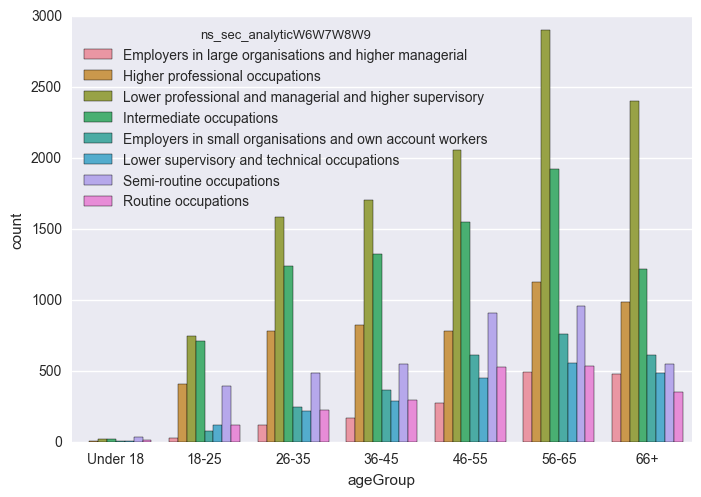

In [25]:
sns.countplot(x='ageGroup', hue='ns_sec_analyticW6W7W8W9', data=BES_Panel);

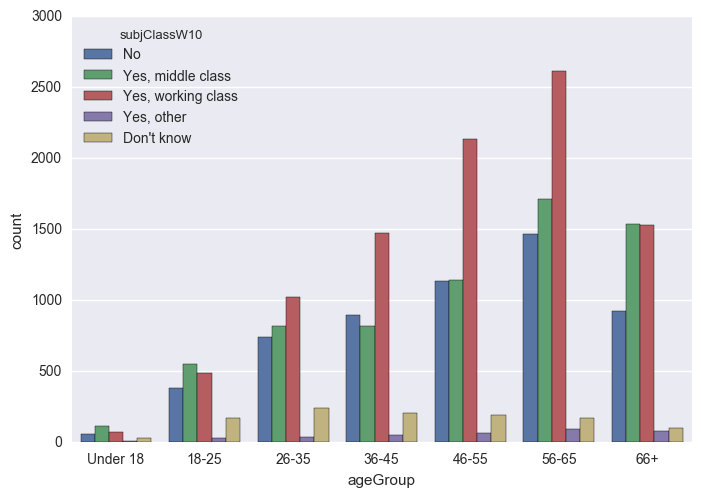

In [50]:
sns.countplot(x='ageGroup', hue='subjClassW10', data=BES_Panel);

In [105]:
BES_Panel['IpsosAgeGroups'] = BES_Panel['ageGroup'].astype('object')
# 18-34, 35-54, 55+
# 18-35, 36-55, 56+ Close!

BES_Panel.loc[BES_Panel['IpsosAgeGroups']=='Under 18', 'IpsosAgeGroups'] = "18-35"
BES_Panel.loc[BES_Panel['IpsosAgeGroups']=='18-25'   , 'IpsosAgeGroups'] = "18-35"
BES_Panel.loc[BES_Panel['IpsosAgeGroups']=='26-35'   , 'IpsosAgeGroups'] = "18-35"
BES_Panel.loc[BES_Panel['IpsosAgeGroups']=='36-45'   , 'IpsosAgeGroups'] = "36-55"
BES_Panel.loc[BES_Panel['IpsosAgeGroups']=='46-55'   , 'IpsosAgeGroups'] = "36-55"
BES_Panel.loc[BES_Panel['IpsosAgeGroups']=='56-65'   , 'IpsosAgeGroups'] = "56+"
BES_Panel.loc[BES_Panel['IpsosAgeGroups']=='66+'     , 'IpsosAgeGroups'] = "56+"
BES_Panel['IpsosAgeGroups'] = BES_Panel['IpsosAgeGroups'].astype("category",
                                                                 categories=["18-35", "36-55", "56+"],
                                                                 ordered=True)


In [106]:
BES_Panel['IpsosSocialGrades'] = BES_Panel['ns_sec_analyticW6W7W8W9'].astype('object')
# AB, C1, C2, DE
# 18-35, 36-55, 56+ Close!

replace_dict = {'Employers in large organisations and higher managerial': 'AB',
                'Higher professional occupations': 'AB',
                'Lower professional and managerial and higher supervisory': 'C1',
                'Intermediate occupations': 'C2',
                'Employers in small organisations and own account workers': 'C2',
                'Lower supervisory and technical occupations': 'C2',
                'Semi-routine occupations': 'DE',
                'Routine occupations': 'DE'                
                }

for key in replace_dict.keys():
    BES_Panel.loc[BES_Panel['IpsosSocialGrades']==key, 'IpsosSocialGrades'] = replace_dict[key]

BES_Panel['IpsosSocialGrades'] = BES_Panel['IpsosSocialGrades'].astype("category",
                                                                 categories=["AB", "C1", "C2", "DE"],
                                                                 ordered=True)


In [190]:
BES_Panel['IpsosVI'] = BES_Panel['generalElectionVoteW10'].astype('object')
# AB, C1, C2, DE
# 18-35, 36-55, 56+ Close!

replace_dict = {'I would not vote':'drop',
                'Conservative': 'CON',
                'Labour':'LAB',
                'Liberal Democrat':'LD',
                'Scottish National Party (SNP)':'drop',
                'Plaid Cymru':'drop',
                'United Kingdom Independence Party (UKIP)':'UKIP',
                'Green Party':'drop',
                'Other':'drop',
                'Don\'t know':'drop'              
                }

for key in replace_dict.keys():
    BES_Panel.loc[BES_Panel['IpsosVI']==key, 'IpsosVI'] = replace_dict[key]

BES_Panel['IpsosVI'] = BES_Panel['IpsosVI'].astype("category",
                                                                 categories=['CON','LAB','LD','UKIP'],
                                                                 ordered=True)


In [191]:
BES_Panel['IpsosVI'].value_counts()

CON     8713
LAB     6587
UKIP    2656
LD      2510
Name: IpsosVI, dtype: int64

In [109]:
BES_Panel['IpsosSocialGrades'].value_counts()

C2    12850
C1    11429
AB     6515
DE     5992
Name: IpsosSocialGrades, dtype: int64

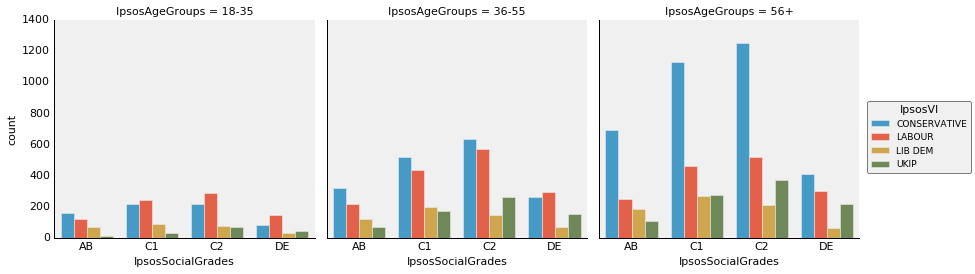

In [142]:
sns.factorplot(x='IpsosSocialGrades', hue='IpsosVI', col='IpsosAgeGroups', data=BES_Panel, kind='count');

# sns.barplot(x='IpsosSocialGrades', hue='generalElectionVoteW10', data=BES_Panel[BES_Panel['IpsosAgeGroups']=='18-35']);

In [65]:
pd.crosstab(BES_Panel['IpsosSocialGrades'],
            BES_Panel['IpsosVI'],
            normalize='index',
            values  = BES_Panel["wt_full_W10"],
            aggfunc = sum)

IpsosVI,CONSERVATIVE,LABOUR,LIB DEM,UKIP
IpsosSocialGrades,,,,
AB,0.521721,0.242875,0.168399,0.067005
C1,0.468831,0.285972,0.145768,0.099428
C2,0.448573,0.321716,0.102657,0.127054
DE,0.358487,0.405262,0.083830,0.152421


In [66]:
import holoviews as hv
hv.notebook_extension()

:Layout
   .Bars.I   :Bars   [IpsosSocialGrades,IpsosVI]   (voteshare%)
   .Bars.II  :Bars   [IpsosSocialGrades,IpsosVI]   (voteshare%)
   .Bars.III :Bars   [IpsosSocialGrades,IpsosVI]   (voteshare%)
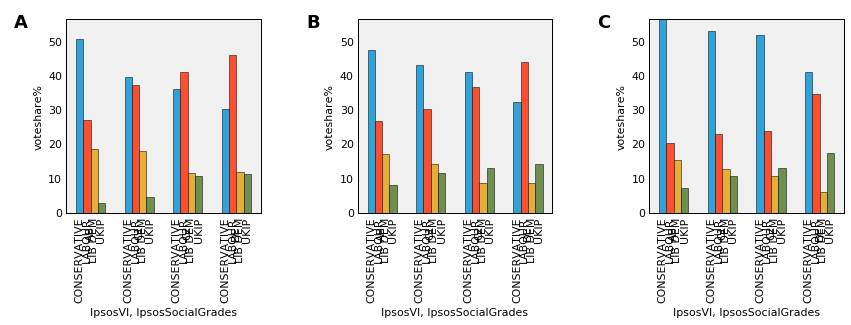

In [149]:
%opts Bars [xrotation=90 show_legend=False]
age_axis = "age"
age_dim = hv.Dimension(x_axis,values = [0,1,2])

bars   = hv.HoloMap(kdims=[age_dim])

x_axis = "IpsosSocialGrades"
y_axis = "voteshare"
x_dim = hv.Dimension(x_axis,values = list(ct.index))

for age in [0,1,2]:
    
    age_filter = BES_Panel['IpsosAgeGroups']==BES_Panel['IpsosAgeGroups'].cat.categories[age]
    BES_age =    BES_Panel[age_filter]
    weights =   BES_Panel["wt_full_W10"][age_filter]   
    
    x_axis = "IpsosSocialGrades"
    y_axis = "voteshare%"
    x_dim = hv.Dimension(x_axis,values = list(ct.index))

    crosstab = pd.crosstab(BES_age['IpsosSocialGrades'],
                BES_age['IpsosVI'],
                normalize='index',
                values  = weights,
                aggfunc = sum)    
    
#     (crosstab[1.0]*100).round(decimals=2) 

    ct = crosstab.unstack('IpsosSocialGrades')
    ct = ct.reset_index(['IpsosVI','IpsosSocialGrades'])
    ct.columns=["IpsosVI",x_axis,y_axis]
    ct[y_axis] = (ct[y_axis]*100).round(decimals=2)
#     ct

    key_dimensions   = [("IpsosVI", "IpsosVI"), ('IpsosSocialGrades', 'IpsosSocialGrades')]
    value_dimensions = [(y_axis, y_axis)]

    ct_table = hv.Table(ct, kdims=key_dimensions, vdims=value_dimensions)
    ct_table.to.bars(["IpsosSocialGrades","IpsosVI"],y_axis)

    bars[age] = ct_table.to.bars(["IpsosSocialGrades","IpsosVI"],y_axis)
    
bars[0] + bars[1] + bars[2]

In [ ]:
## okay - basically a replication (of trend, if not absolute Con/Lab leads)
# Remember - there's no turnout model here, this is just raw demographic voting intention
# And it's from 6 months before the election!


In [221]:
%opts Bars [bgcolor='w' aspect=1 figure_size=600 show_frame=False]

:Layout
   .Bars.I   :Bars   [ns_sec_analyticW6W7W8W9,IpsosVI]   (voteshare)
   .Bars.II  :Bars   [ns_sec_analyticW6W7W8W9,IpsosVI]   (voteshare)
   .Bars.III :Bars   [ns_sec_analyticW6W7W8W9,IpsosVI]   (voteshare)
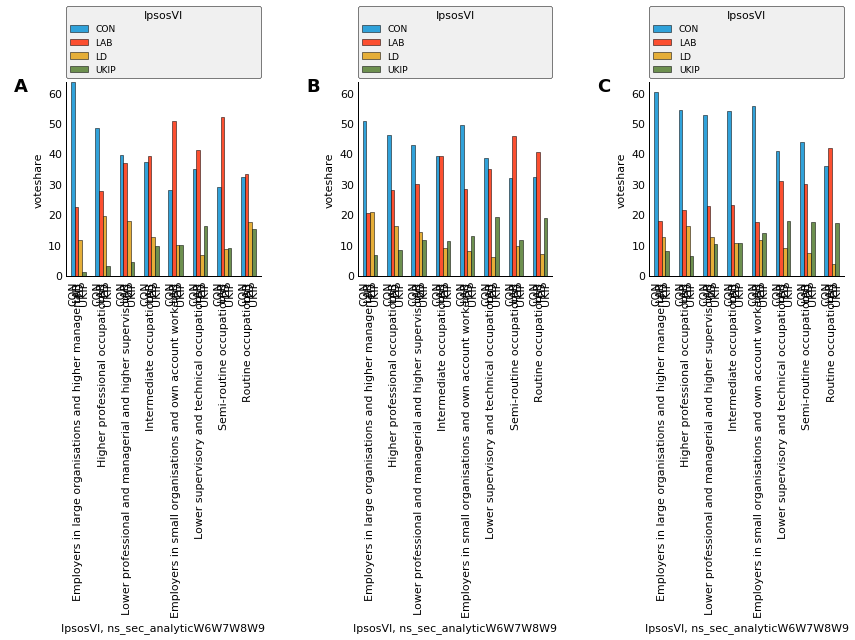

In [192]:
%%opts Bars [category_index=1 group_index=0 legend_position='top' color_by=['category'] legend_cols=1 show_legend=True]

# legend_position='top' legend_cols=7
# %opts Bars [xrotation=90 show_legend=False]

age_axis = "age"
age_dim = hv.Dimension(x_axis,values = [0,1,2])

bars   = hv.HoloMap(kdims=[age_dim])

x_axis = 'ns_sec_analyticW6W7W8W9'

x_dim = hv.Dimension(x_axis,values = list(BES_Panel['ns_sec_analyticW6W7W8W9'].cat.categories))


y_axis = "voteshare"

for age in [0,1,2]:
    
    age_filter = BES_Panel['IpsosAgeGroups']==BES_Panel['IpsosAgeGroups'].cat.categories[age]
    BES_age =    BES_Panel[age_filter]
    weights =   BES_Panel["wt_full_W10"][age_filter]   
    
#     x_axis = "IpsosSocialGrades"
#     y_axis = "voteshare%"
#     x_dim = hv.Dimension(x_axis,values = list(ct.index))

    crosstab = pd.crosstab(BES_age[x_axis],
                BES_age['IpsosVI'],
                normalize='index',
                values  = weights,
                aggfunc = sum)    
    
#     (crosstab[1.0]*100).round(decimals=2) 

    ct = crosstab.unstack(x_axis)
    ct = ct.reset_index(['IpsosVI',x_axis])
    ct.columns=["IpsosVI",x_axis,y_axis]
    ct[y_axis] = (ct[y_axis]*100).round(decimals=2)
#     ct

    key_dimensions   = [("IpsosVI", "IpsosVI"), (x_axis, x_axis)]
    value_dimensions = [(y_axis, y_axis)]

    ct_table = hv.Table(ct, kdims=key_dimensions, vdims=value_dimensions)
    ct_table.to.bars([x_axis,"IpsosVI"],y_axis)

    bars[age] = ct_table.to.bars([x_axis,"IpsosVI"],y_axis)
    
bars[0] + bars[1] + bars[2]

:Layout
   .Bars.I   :Bars   [ns_secW6W7W8W9,IpsosVI]   (voteshare)
   .Bars.II  :Bars   [ns_secW6W7W8W9,IpsosVI]   (voteshare)
   .Bars.III :Bars   [ns_secW6W7W8W9,IpsosVI]   (voteshare)
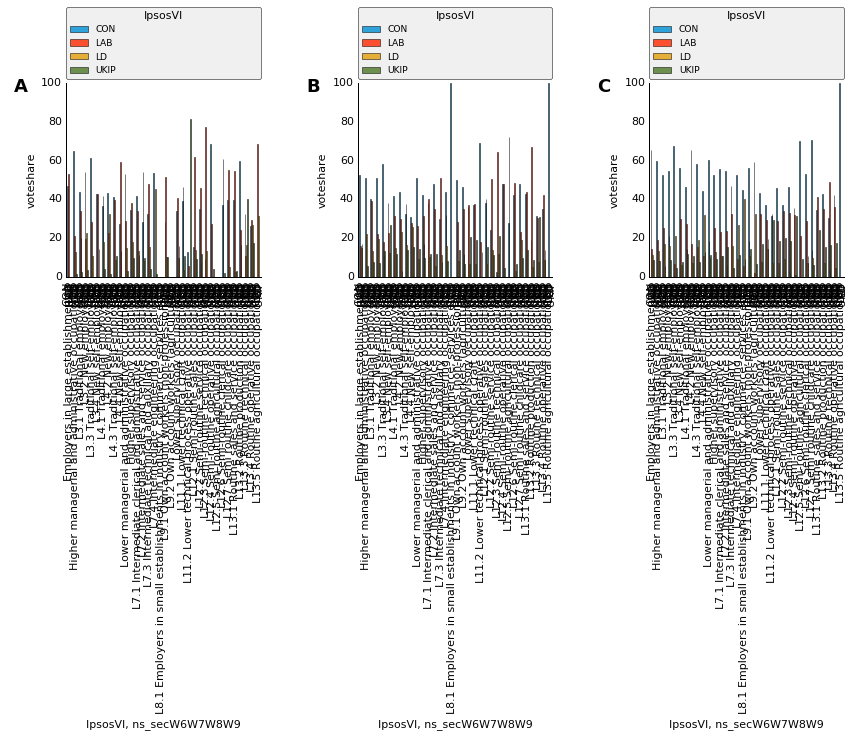

In [211]:
%%opts Bars [category_index=1 group_index=0 legend_position='top' color_by=['category'] legend_cols=1 show_legend=True]

# legend_position='top' legend_cols=7
# %opts Bars [xrotation=90 show_legend=False]

age_axis = "age"
age_dim = hv.Dimension(x_axis,values = [0,1,2])

bars   = hv.HoloMap(kdims=[age_dim])

x_axis = 'ns_secW6W7W8W9'

x_dim = hv.Dimension(x_axis,values = list(BES_Panel[x_axis].cat.categories))


y_axis = "voteshare"

for age in [0,1,2]:
    
    age_filter = BES_Panel['IpsosAgeGroups']==BES_Panel['IpsosAgeGroups'].cat.categories[age]
    BES_age =    BES_Panel[age_filter]
    weights =   BES_Panel["wt_full_W10"][age_filter]   
    
#     x_axis = "IpsosSocialGrades"
#     y_axis = "voteshare%"
#     x_dim = hv.Dimension(x_axis,values = list(ct.index))

    crosstab = pd.crosstab(BES_age[x_axis],
                BES_age['IpsosVI'],
                normalize='index',
                values  = weights,
                aggfunc = sum)    
    
#     (crosstab[1.0]*100).round(decimals=2) 

    ct = crosstab.unstack(x_axis)
    ct = ct.reset_index(['IpsosVI',x_axis])
    ct.columns=["IpsosVI",x_axis,y_axis]
    ct[y_axis] = (ct[y_axis]*100).round(decimals=2)
#     ct

    key_dimensions   = [("IpsosVI", "IpsosVI"), (x_axis, x_axis)]
    value_dimensions = [(y_axis, y_axis)]

    ct_table = hv.Table(ct, kdims=key_dimensions, vdims=value_dimensions)
    ct_table.to.bars([x_axis,"IpsosVI"],y_axis)

    bars[age] = ct_table.to.bars([x_axis,"IpsosVI"],y_axis)
    
bars[0] + bars[1] + bars[2]

b':Bars   [ns_secW6W7W8W9,IpsosVI]   (voteshare)'
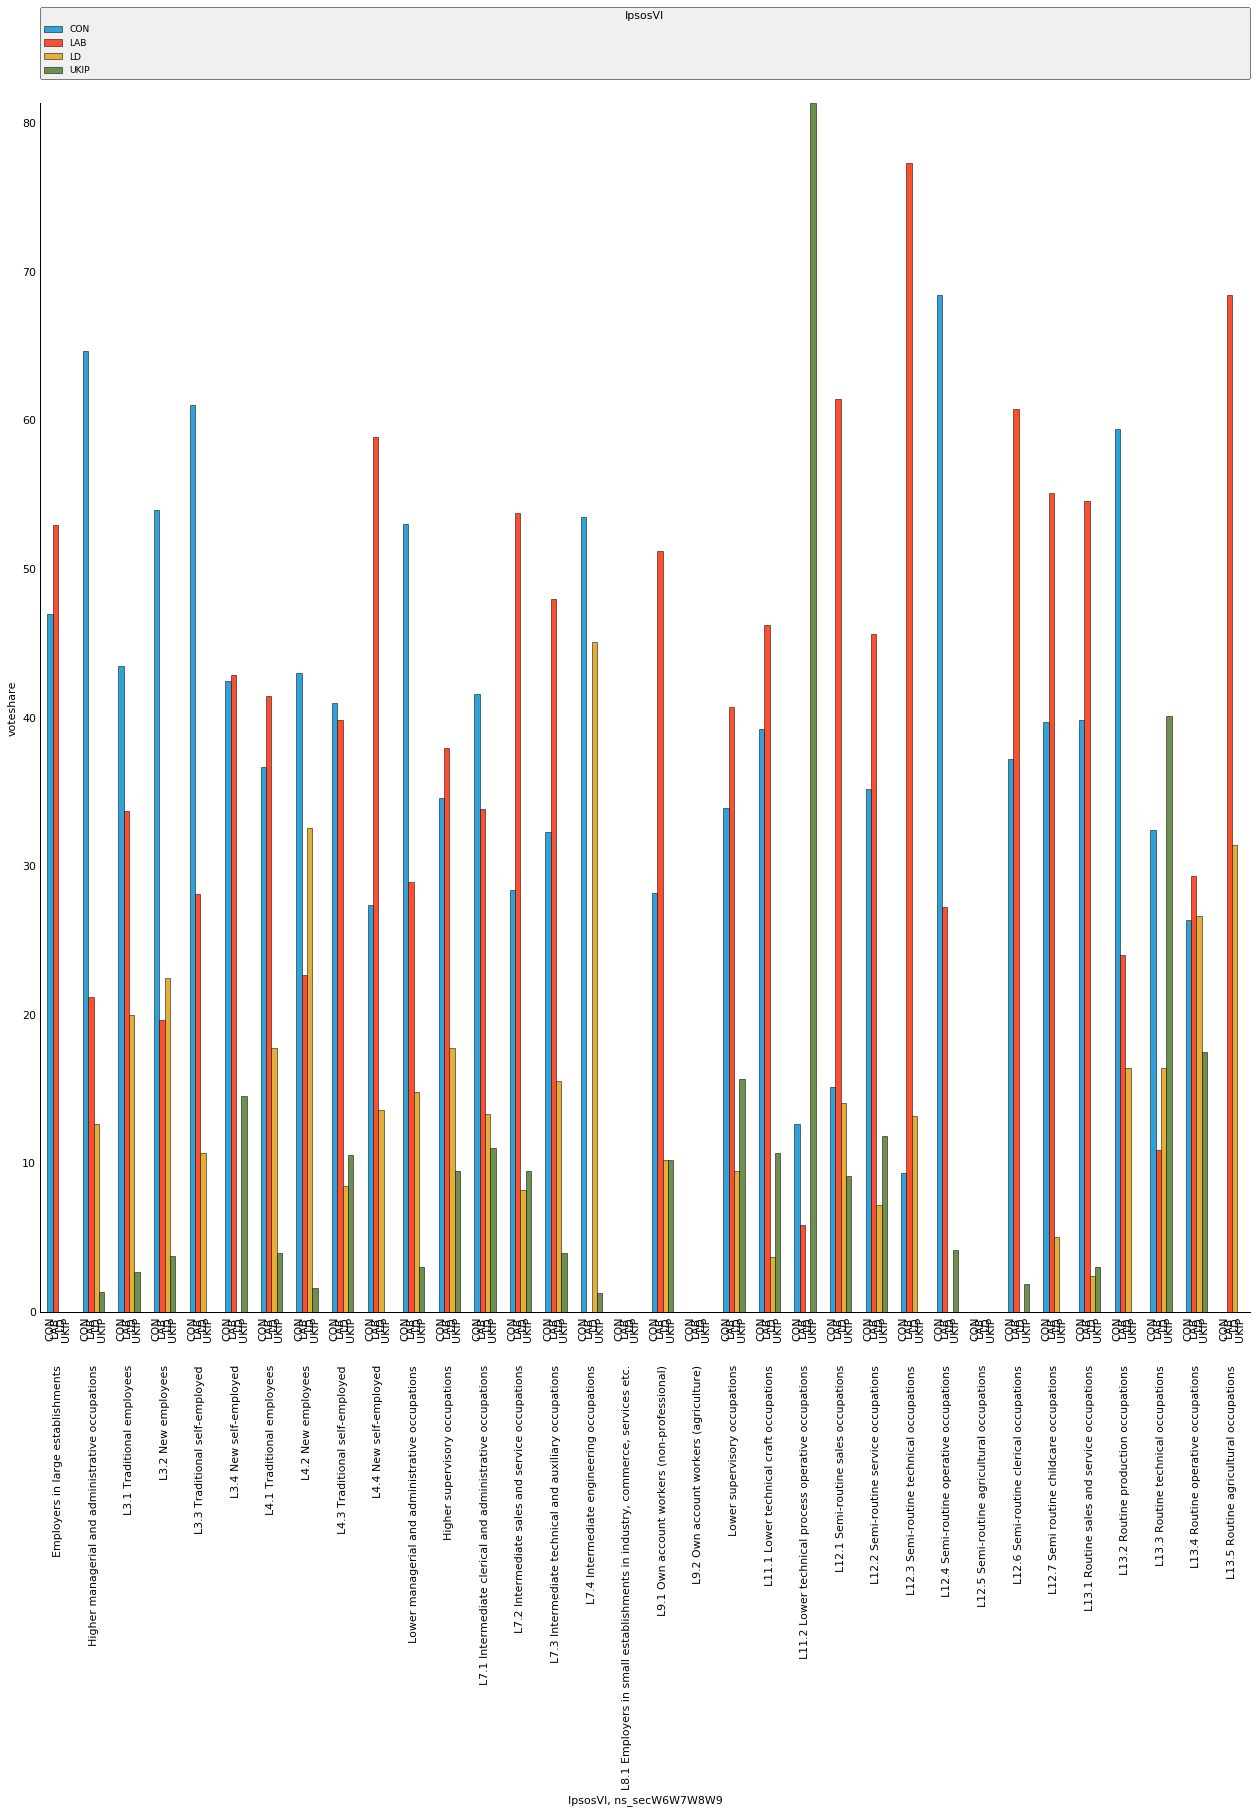

In [213]:
bars[0]

L7.1 Intermediate clerical and administrative occupations                      2156
L4.1 Traditional employees                                                     2033
Higher supervisory occupations                                                 1382
L9.1 Own account workers (non-professional)                                    1323
Lower managerial and administrative occupations                                1176
L3.1 Traditional employees                                                     1034
Higher managerial and administrative occupations                                838
L3.2 New employees                                                              779
Lower supervisory occupations                                                   694
L12.2 Semi-routine service occupations                                          615
L7.2 Intermediate sales and service occupations                                 492
L13.3 Routine technical occupations                                         

b':Bars   [ns_secW6W7W8W9,IpsosVI]   (voteshare)'
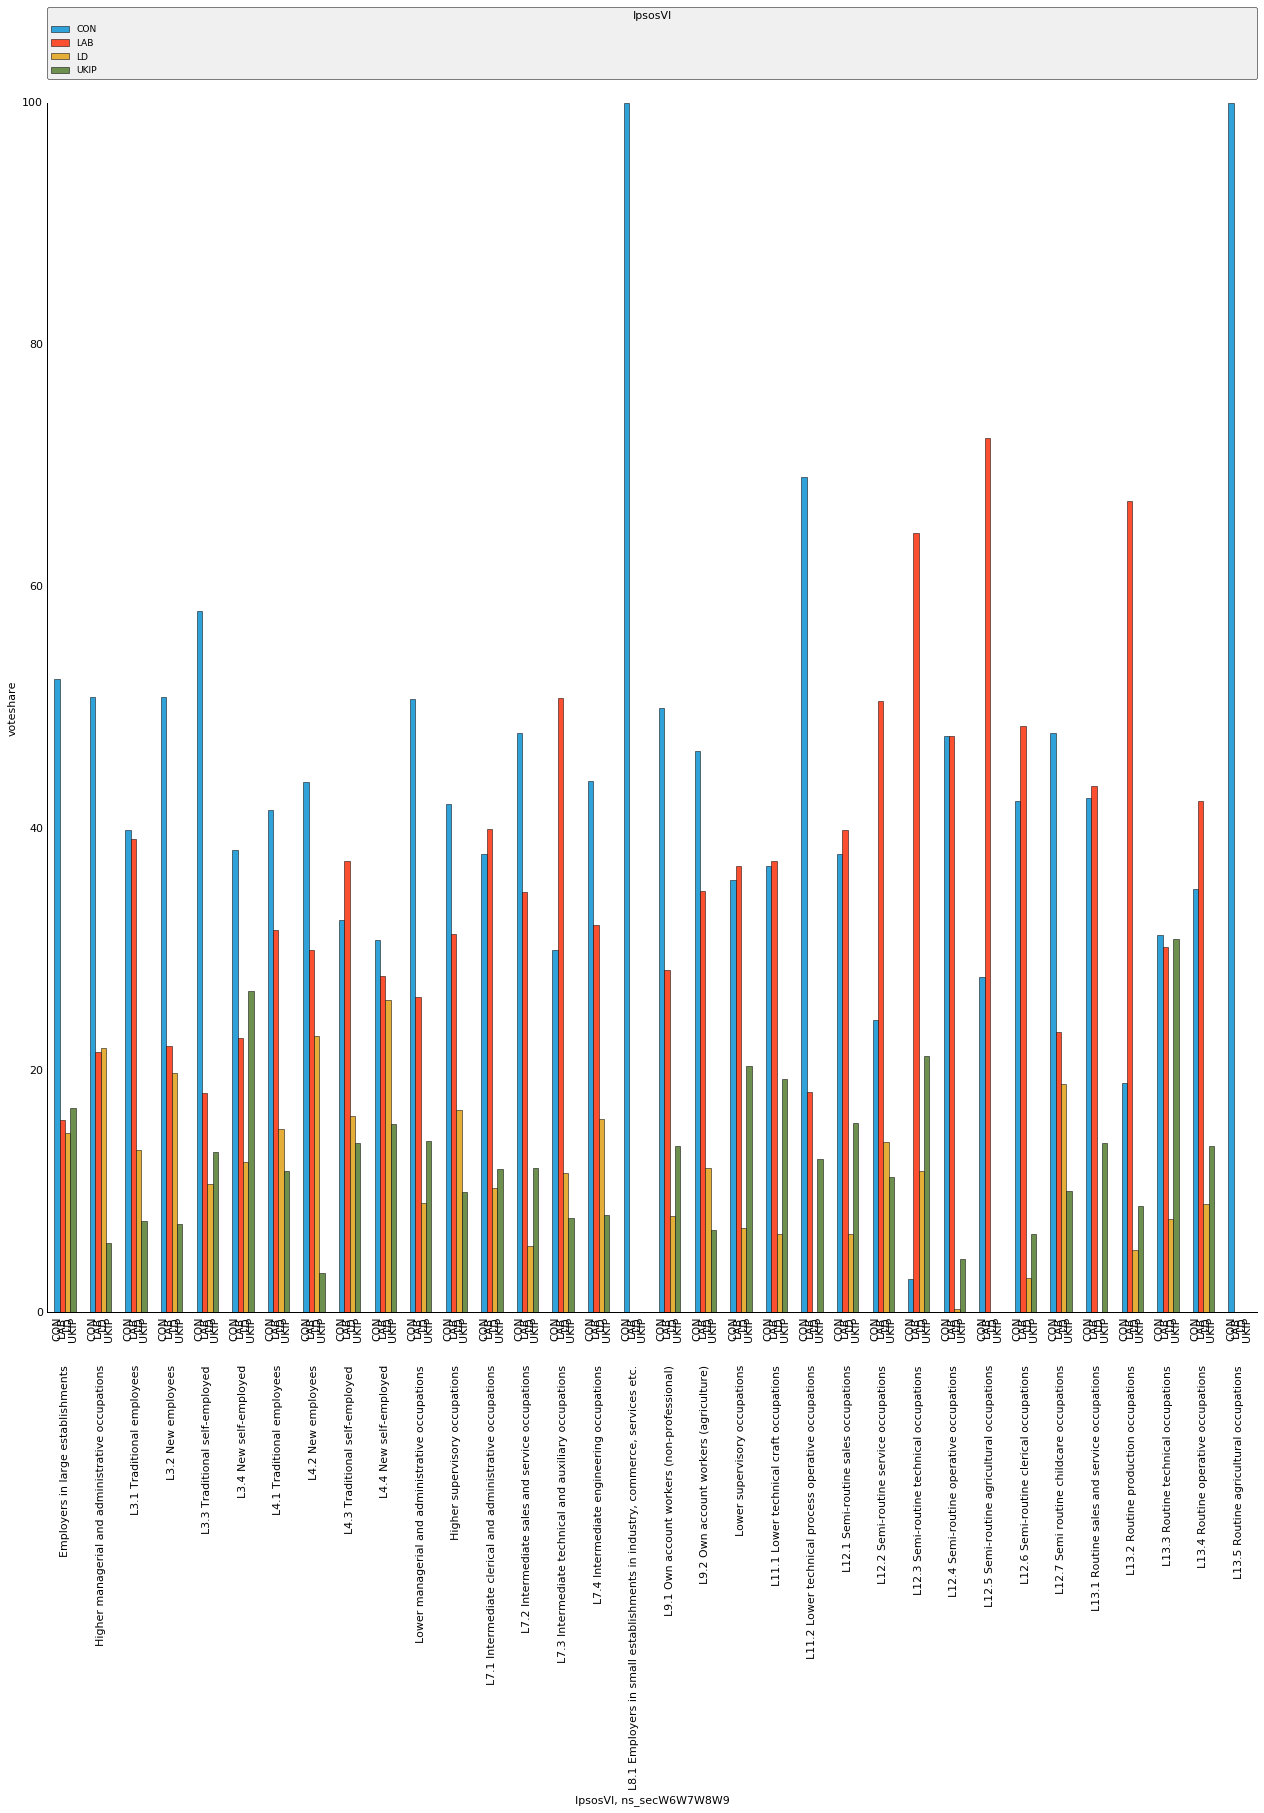

In [220]:
bars[1]

:Layout
   .Bars.I   :Bars   [subjClassW10,IpsosVI]   (voteshare)
   .Bars.II  :Bars   [subjClassW10,IpsosVI]   (voteshare)
   .Bars.III :Bars   [subjClassW10,IpsosVI]   (voteshare)
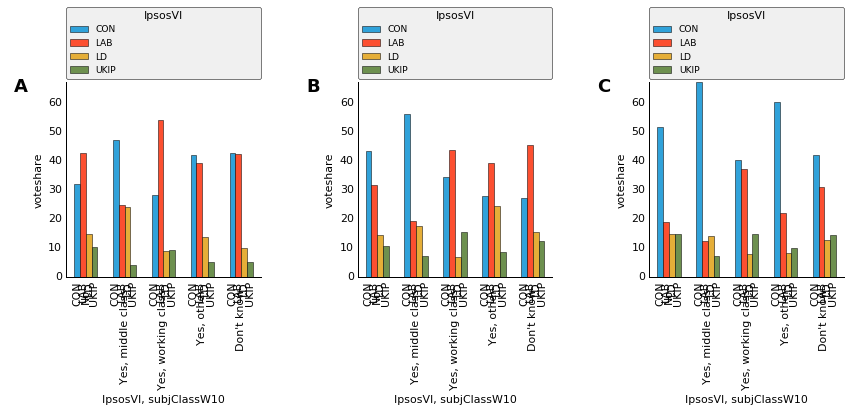

In [222]:
%%opts Bars [category_index=1 group_index=0 legend_position='top' color_by=['category'] legend_cols=1 show_legend=True]

# legend_position='top' legend_cols=7
# %opts Bars [xrotation=90 show_legend=False]

age_axis = "age"
age_dim = hv.Dimension(x_axis,values = [0,1,2])

bars   = hv.HoloMap(kdims=[age_dim])

x_axis = 'subjClassW10'

x_dim = hv.Dimension(x_axis,values = list(BES_Panel[x_axis].cat.categories))


y_axis = "voteshare"

for age in [0,1,2]:
    
    age_filter = BES_Panel['IpsosAgeGroups']==BES_Panel['IpsosAgeGroups'].cat.categories[age]
    BES_age =    BES_Panel[age_filter]
    weights =   BES_Panel["wt_full_W10"][age_filter]   
    
#     x_axis = "IpsosSocialGrades"
#     y_axis = "voteshare%"
#     x_dim = hv.Dimension(x_axis,values = list(ct.index))

    crosstab = pd.crosstab(BES_age[x_axis],
                BES_age['IpsosVI'],
                normalize='index',
                values  = weights,
                aggfunc = sum)    
    
#     (crosstab[1.0]*100).round(decimals=2) 

    ct = crosstab.unstack(x_axis)
    ct = ct.reset_index(['IpsosVI',x_axis])
    ct.columns=["IpsosVI",x_axis,y_axis]
    ct[y_axis] = (ct[y_axis]*100).round(decimals=2)
#     ct

    key_dimensions   = [("IpsosVI", "IpsosVI"), (x_axis, x_axis)]
    value_dimensions = [(y_axis, y_axis)]

    ct_table = hv.Table(ct, kdims=key_dimensions, vdims=value_dimensions)
    ct_table.to.bars([x_axis,"IpsosVI"],y_axis)

    bars[age] = ct_table.to.bars([x_axis,"IpsosVI"],y_axis)
    
bars[0] + bars[1] + bars[2]

In [227]:
BES_age[x_axis].cat.categories

Index(['No', 'Yes, middle class', 'Yes, working class', 'Yes, other',
       'Don't know'],
      dtype='object')

:Layout
   .Bars.I   :Bars   [profile_education_age,IpsosVI]   (voteshare)
   .Bars.II  :Bars   [profile_education_age,IpsosVI]   (voteshare)
   .Bars.III :Bars   [profile_education_age,IpsosVI]   (voteshare)
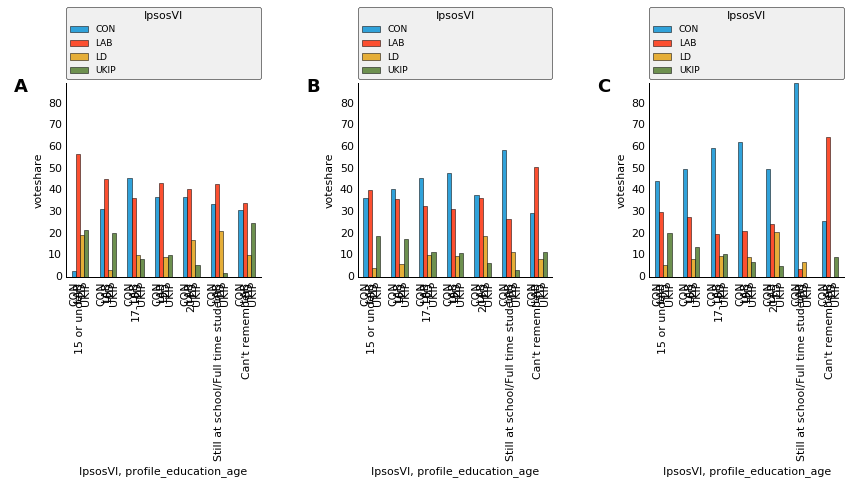

In [249]:
%%opts Bars [category_index=1 group_index=0 legend_position='top' color_by=['category'] legend_cols=1 show_legend=True]

# legend_position='top' legend_cols=7
# %opts Bars [xrotation=90 show_legend=False]

age_axis = "age"
age_dim = hv.Dimension(x_axis,values = [0,1,2])

bars   = hv.HoloMap(kdims=[age_dim])

x_axis = 'profile_education_age'

x_dim = hv.Dimension(x_axis,values = list(BES_Panel[x_axis].cat.categories))


y_axis = "voteshare"

for age in [0,1,2]:
    
    age_filter = BES_Panel['IpsosAgeGroups']==BES_Panel['IpsosAgeGroups'].cat.categories[age]
    BES_age =    BES_Panel[age_filter]
    weights =   BES_Panel["wt_full_W10"][age_filter]   
    
#     x_axis = "IpsosSocialGrades"
#     y_axis = "voteshare%"
#     x_dim = hv.Dimension(x_axis,values = list(ct.index))

    crosstab = pd.crosstab(BES_age[x_axis],
                BES_age['IpsosVI'],
                normalize='index',
                values  = weights,
                aggfunc = sum)    
    
#     (crosstab[1.0]*100).round(decimals=2) 

    ct = crosstab.unstack(x_axis)
    ct = ct.reset_index(['IpsosVI',x_axis])
    ct.columns=["IpsosVI",x_axis,y_axis]
    ct[y_axis] = (ct[y_axis]*100).round(decimals=2)
#     ct

    key_dimensions   = [("IpsosVI", "IpsosVI"), (x_axis, x_axis)]
    value_dimensions = [(y_axis, y_axis)]

    ct_table = hv.Table(ct, kdims=key_dimensions, vdims=value_dimensions)
    ct_table.to.bars([x_axis,"IpsosVI"],y_axis)

    bars[age] = ct_table.to.bars([x_axis,"IpsosVI"],y_axis)
    
bars[0] + bars[1] + bars[2]

In [248]:
BES_Panel['profile_education_age'].value_counts()

20+                                  16462
16                                   10572
17-18                                10097
15 or under                           5297
Still at school/Full time student     3908
19                                    2305
Can't remember                         400
Name: profile_education_age, dtype: int64

In [ ]:
# BES_Panel['IpsosAgeGroups'] = BES_Panel['ageGroup'].astype('object')
# # 18-34, 35-54, 55+
# # 18-35, 36-55, 56+ Close!

# BES_Panel.loc[BES_Panel['IpsosAgeGroups']=='Under 18', 'IpsosAgeGroups'] = "18-35"
# BES_Panel.loc[BES_Panel['IpsosAgeGroups']=='18-25'   , 'IpsosAgeGroups'] = "18-35"
# BES_Panel.loc[BES_Panel['IpsosAgeGroups']=='26-35'   , 'IpsosAgeGroups'] = "18-35"
# BES_Panel.loc[BES_Panel['IpsosAgeGroups']=='36-45'   , 'IpsosAgeGroups'] = "36-55"
# BES_Panel.loc[BES_Panel['IpsosAgeGroups']=='46-55'   , 'IpsosAgeGroups'] = "36-55"
# BES_Panel.loc[BES_Panel['IpsosAgeGroups']=='56-65'   , 'IpsosAgeGroups'] = "56-65"
# BES_Panel.loc[BES_Panel['IpsosAgeGroups']=='66+'     , 'IpsosAgeGroups'] = "66+"
# BES_Panel['IpsosAgeGroups'] = BES_Panel['IpsosAgeGroups'].astype("category",
#                                                                  categories=["18-35", "36-55", "56-65", "66+"],
#                                                                  ordered=True)


In [294]:
BES_Panel['IpsosSocialGrades'] = BES_Panel['ns_sec_analyticW6W7W8W9'].astype('object')
# AB, C1, C2, DE
# 18-35, 36-55, 56+ Close!

replace_dict = {'Employers in large organisations and higher managerial': 'AB',
                'Higher professional occupations': 'AB',
                'Lower professional and managerial and higher supervisory': 'C1',
                'Intermediate occupations': 'C2',
                'Employers in small organisations and own account workers': 'C2',
                'Lower supervisory and technical occupations': 'C2',
                'Semi-routine occupations': 'DE',
                'Routine occupations': 'DE'                
                }

for key in replace_dict.keys():
    BES_Panel.loc[BES_Panel['IpsosSocialGrades']==key, 'IpsosSocialGrades'] = replace_dict[key]

    
BES_Panel.loc[BES_Panel['profile_education_age']=='Still at school/Full time student', 'IpsosSocialGrades']\
    = "Student"
    
BES_Panel['IpsosSocialGrades'] = BES_Panel['IpsosSocialGrades'].astype("category",
                                                                 categories=["AB", "C1", "C2", "DE", "Student"],
                                                                 ordered=True)


:Layout
   .Bars.Under_18             :Bars   [IpsosSocialGrades,IpsosVI]   (voteshare)
   .Bars.A_18_hyphen_minus_25 :Bars   [IpsosSocialGrades,IpsosVI]   (voteshare)
   .Bars.A_26_hyphen_minus_35 :Bars   [IpsosSocialGrades,IpsosVI]   (voteshare)
   .Bars.A_36_hyphen_minus_45 :Bars   [IpsosSocialGrades,IpsosVI]   (voteshare)
   .Bars.A_46_hyphen_minus_55 :Bars   [IpsosSocialGrades,IpsosVI]   (voteshare)
   .Bars.A_56_hyphen_minus_65 :Bars   [IpsosSocialGrades,IpsosVI]   (voteshare)
   .Bars.A_66_plus            :Bars   [IpsosSocialGrades,IpsosVI]   (voteshare)
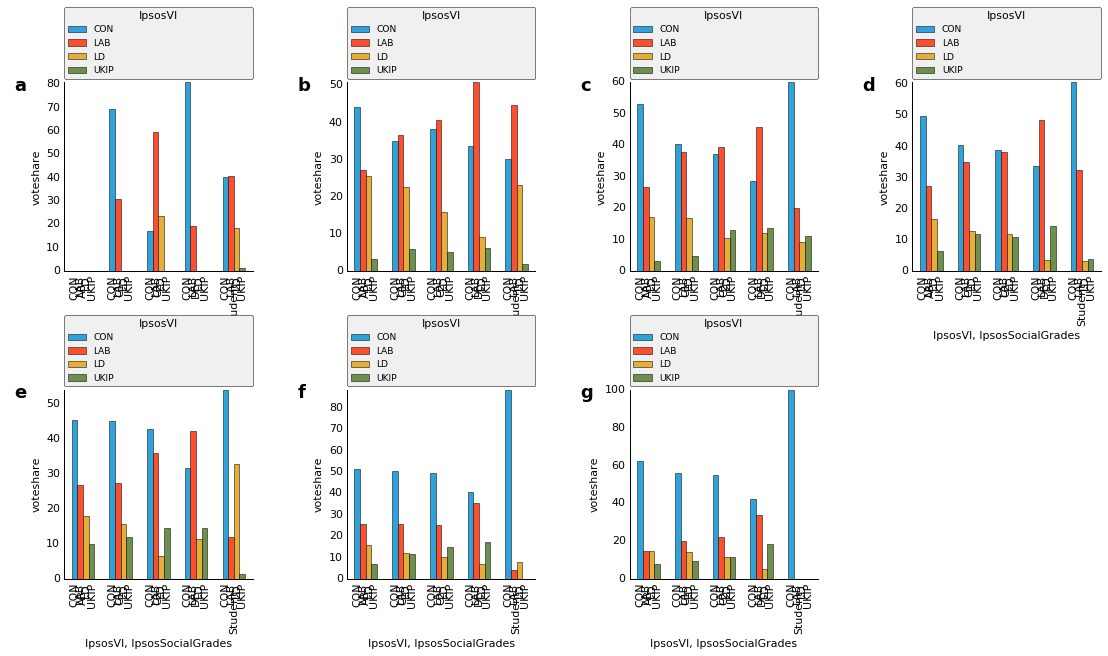

In [301]:
%%opts Bars [category_index=1 group_index=0 legend_position='top' color_by=['category'] legend_cols=1 show_legend=True]
%%opts Layout [sublabel_format="{alpha}"]
# legend_position='top' legend_cols=7
# %opts Bars [xrotation=90 show_legend=False]

age_category = 'ageGroup'
age_axis = "age"
num_age_categories = len( BES_Panel[age_category].cat.categories )
age_dim = hv.Dimension(x_axis,values = range(0, num_age_categories))

bars   = hv.HoloMap(kdims=[age_dim])

x_axis = "IpsosSocialGrades"

x_dim = hv.Dimension(x_axis,values = list(BES_Panel[x_axis].cat.categories))



voting_intention = "IpsosVI"

y_axis = "voteshare"

for age in range(0, num_age_categories):
    
    age_filter = BES_Panel[age_category]==BES_Panel[age_category].cat.categories[age]
    BES_age =    BES_Panel[age_filter]
    weights =   BES_Panel["wt_full_W10"][age_filter]   

    crosstab = pd.crosstab(BES_age[x_axis],
                BES_age[voting_intention],
                normalize='index',
                values  = weights,
                aggfunc = sum)    
    
    ct = crosstab.unstack(x_axis)
    ct = ct.reset_index([voting_intention,x_axis])
    ct.columns=[voting_intention,x_axis,y_axis]
    ct[y_axis] = (ct[y_axis]*100).round(decimals=2)

    key_dimensions   = [(voting_intention, voting_intention), (x_axis, x_axis)]
    value_dimensions = [(y_axis, y_axis)]

    ct_table = hv.Table(ct, kdims=key_dimensions, vdims=value_dimensions)
    ct_table.to.bars([x_axis,voting_intention],y_axis)

    bars[age] = ct_table.to.bars([x_axis,voting_intention],y_axis, label = BES_Panel[age_category].cat.categories[age])
    
bars[0] + bars[1] + bars[2] + bars[3] + bars[4] + bars[5] + bars[6]

In [305]:
BES_Panel['ageGroup'].cat.categories

Index(['Under 18', '18-25', '26-35', '36-45', '46-55', '56-65', '66+'], dtype='object')

:Layout
   .Bars.A_18_hyphen_minus_35 :Bars   [IpsosSocialGrades,IpsosVI]   (voteshare)
   .Bars.A_36_hyphen_minus_55 :Bars   [IpsosSocialGrades,IpsosVI]   (voteshare)
   .Bars.A_56_plus            :Bars   [IpsosSocialGrades,IpsosVI]   (voteshare)
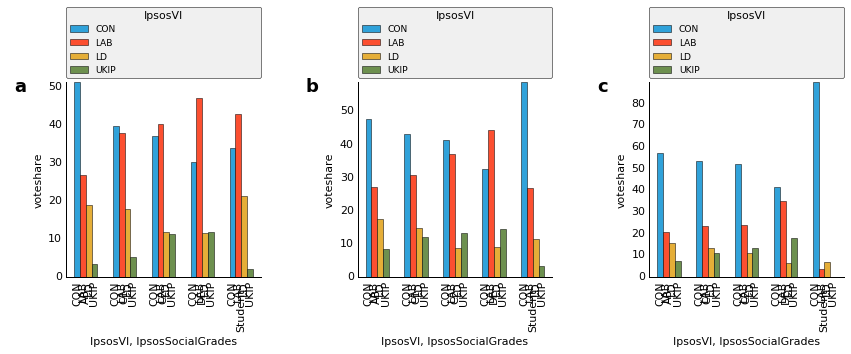

In [303]:
%%opts Bars [category_index=1 group_index=0 legend_position='top' color_by=['category'] legend_cols=1 show_legend=True]
%%opts Layout [sublabel_format="{alpha}"]
# legend_position='top' legend_cols=7
# %opts Bars [xrotation=90 show_legend=False]

age_category = 'IpsosAgeGroups'
age_axis = "age"
num_age_categories = len( BES_Panel[age_category].cat.categories )
age_dim = hv.Dimension(x_axis,values = range(0, num_age_categories))

bars   = hv.HoloMap(kdims=[age_dim])

x_axis = "IpsosSocialGrades"

x_dim = hv.Dimension(x_axis,values = list(BES_Panel[x_axis].cat.categories))



voting_intention = "IpsosVI"

y_axis = "voteshare"

for age in range(0, num_age_categories):
    
    age_filter = BES_Panel[age_category]==BES_Panel[age_category].cat.categories[age]
    BES_age =    BES_Panel[age_filter]
    weights =   BES_Panel["wt_full_W10"][age_filter]   

    crosstab = pd.crosstab(BES_age[x_axis],
                BES_age[voting_intention],
                normalize='index',
                values  = weights,
                aggfunc = sum)    
    
    ct = crosstab.unstack(x_axis)
    ct = ct.reset_index([voting_intention,x_axis])
    ct.columns=[voting_intention,x_axis,y_axis]
    ct[y_axis] = (ct[y_axis]*100).round(decimals=2)

    key_dimensions   = [(voting_intention, voting_intention), (x_axis, x_axis)]
    value_dimensions = [(y_axis, y_axis)]

    ct_table = hv.Table(ct, kdims=key_dimensions, vdims=value_dimensions)
    ct_table.to.bars([x_axis,voting_intention],y_axis)

    bars[age] = ct_table.to.bars([x_axis,voting_intention],y_axis, label = BES_Panel[age_category].cat.categories[age])
    
bars[0] + bars[1] + bars[2]

:Layout
   .Bars.A_18_hyphen_minus_35 :Bars   [profile_gross_household,IpsosVI]   (voteshare)
   .Bars.A_36_hyphen_minus_55 :Bars   [profile_gross_household,IpsosVI]   (voteshare)
   .Bars.A_56_plus            :Bars   [profile_gross_household,IpsosVI]   (voteshare)
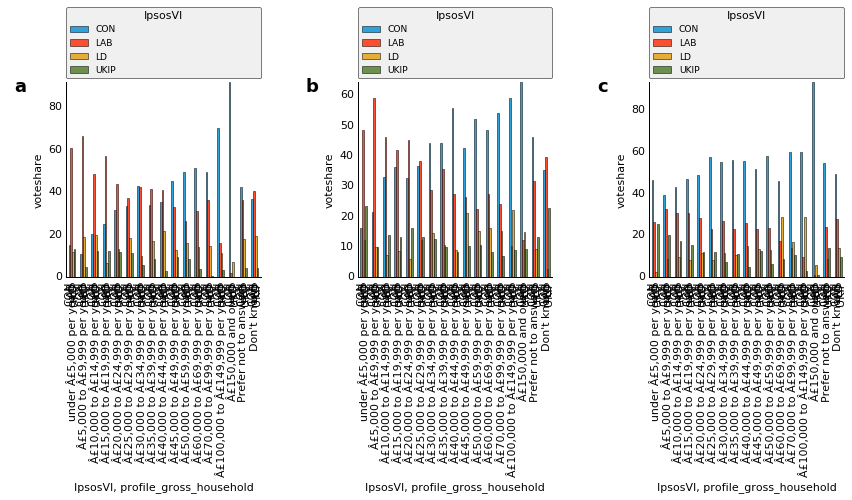

In [312]:
%%opts Bars [category_index=1 group_index=0 legend_position='top' color_by=['category'] legend_cols=1 show_legend=True]
%%opts Layout [sublabel_format="{alpha}"]
# legend_position='top' legend_cols=7
# %opts Bars [xrotation=90 show_legend=False]

age_category = 'IpsosAgeGroups'
age_axis = "age"
num_age_categories = len( BES_Panel[age_category].cat.categories )
age_dim = hv.Dimension(x_axis,values = range(0, num_age_categories))

bars   = hv.HoloMap(kdims=[age_dim])

x_axis = 'profile_gross_household'

x_dim = hv.Dimension(x_axis,values = list(BES_Panel[x_axis].cat.categories))



voting_intention = "IpsosVI"

y_axis = "voteshare"

for age in range(0, num_age_categories):
    
    age_filter = BES_Panel[age_category]==BES_Panel[age_category].cat.categories[age]
    BES_age =    BES_Panel[age_filter]
    weights =   BES_Panel["wt_full_W10"][age_filter]   

    crosstab = pd.crosstab(BES_age[x_axis],
                BES_age[voting_intention],
                normalize='index',
                values  = weights,
                aggfunc = sum)    
    
    ct = crosstab.unstack(x_axis)
    ct = ct.reset_index([voting_intention,x_axis])
    ct.columns=[voting_intention,x_axis,y_axis]
    ct[y_axis] = (ct[y_axis]*100).round(decimals=2)

    key_dimensions   = [(voting_intention, voting_intention), (x_axis, x_axis)]
    value_dimensions = [(y_axis, y_axis)]

    ct_table = hv.Table(ct, kdims=key_dimensions, vdims=value_dimensions)
    ct_table.to.bars([x_axis,voting_intention],y_axis)

    bars[age] = ct_table.to.bars([x_axis,voting_intention],y_axis, label = BES_Panel[age_category].cat.categories[age])
    
bars[0] + bars[1] + bars[2]

b':Bars   [profile_gross_household,IpsosVI]   (voteshare)'
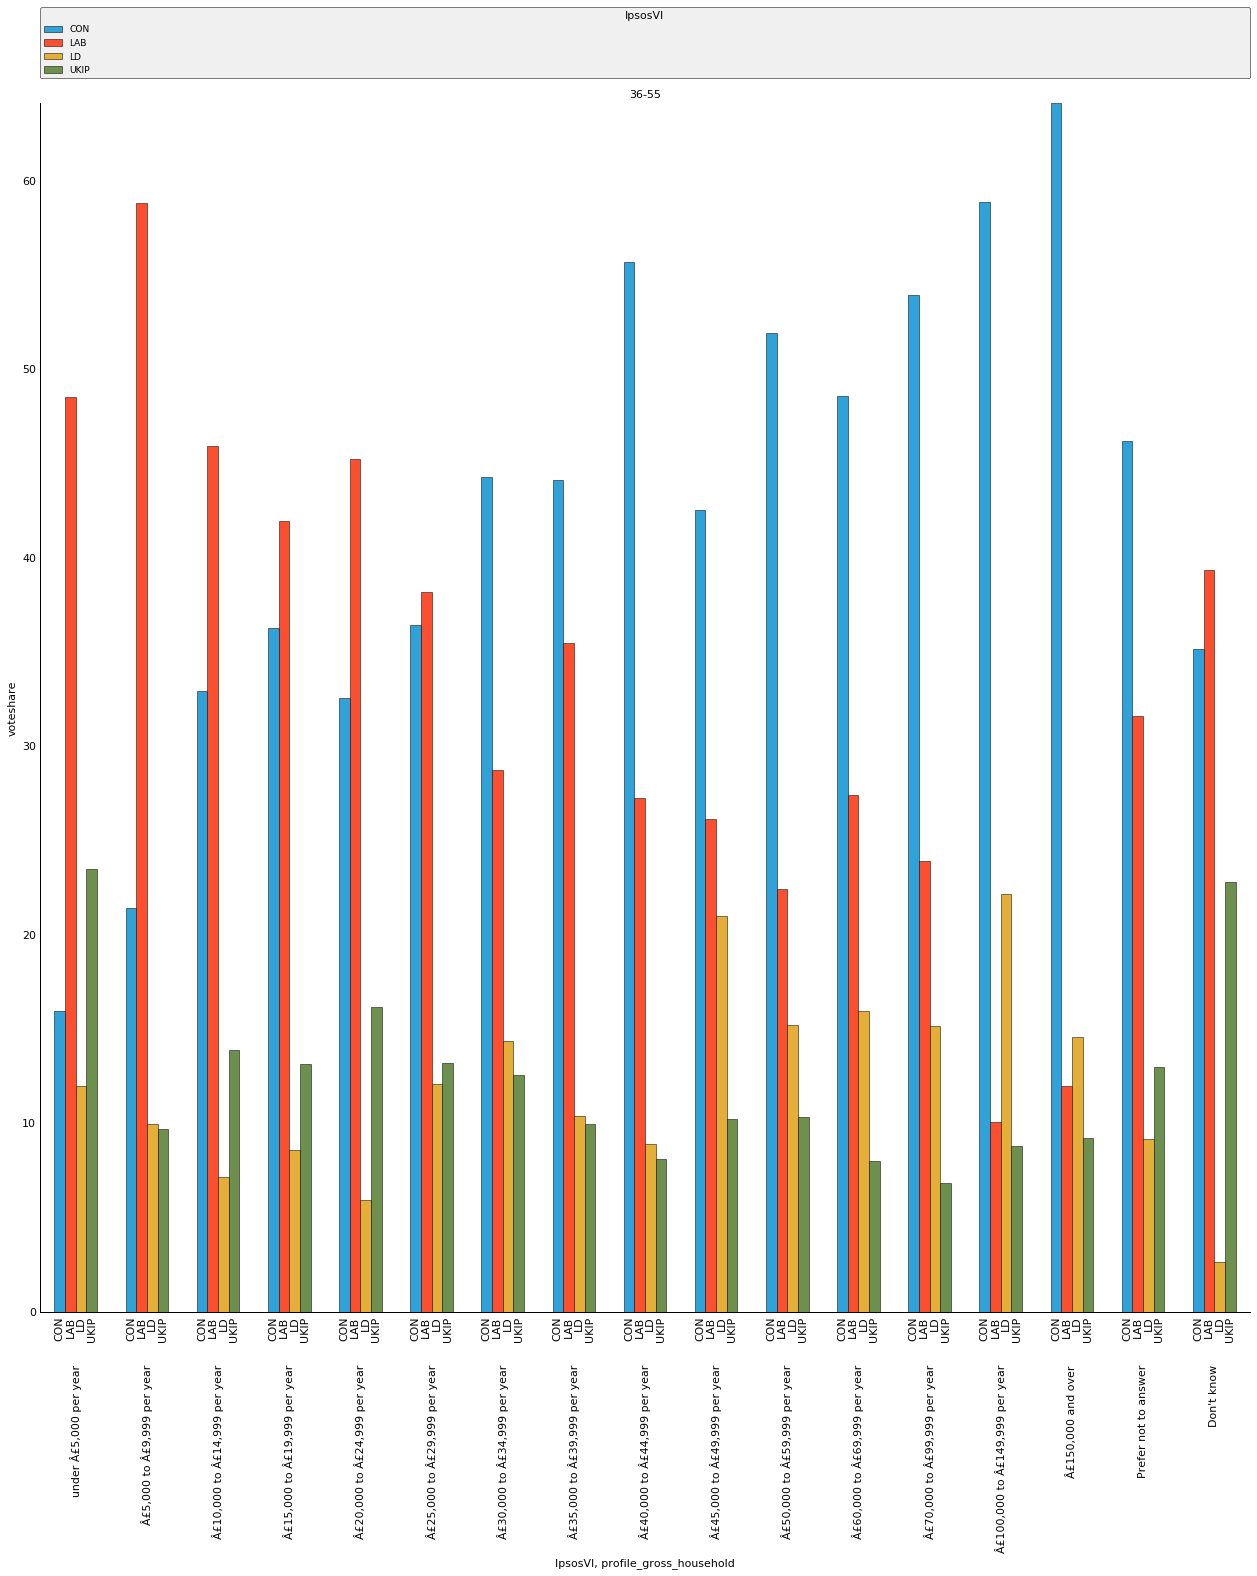

In [314]:
bars[1]